# Step #1 Load the Covid Data

In [2]:
# A tutorial for this file is available at www.relataly.com

# Setup Pakages
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import requests
import json
from pandas.plotting import register_matplotlib_converters

# Load second Dataset with Corona Cases
payload = {"code": "ALL"}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))
df_covid = pd.DataFrame.from_dict(json.loads(response.text))
# df_covid = df_covid[df_covid['code'] == 'US']

# add the date column as variable
df_covid["Date"] = pd.to_datetime(df_covid["date"])

# delete some columns that we won't use
df_covid.drop(
    ["day", "month", "year", "country", "code", "population", "date"],
    axis=1,
    inplace=True,
)

# Summarize cases over all countries
df_covid = df_covid.groupby(["Date"]).sum()
df_covid.head()

,cases,deaths,cases_cum,deaths_cum
Date,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0


# Step #2 Load the Stock Market Data

In [3]:
df_covid_new = df_covid.copy()

# Read the data for different assets
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2020-01-01"
asset_dict = {
    "^GSPC": "SP500",
    "DAX": "DAX",
    "^N225": "N225",
    "ES=F": "SP500FutJune20",
    "LHA.DE": "Lufthansa",
    "AAL": "AmericanAirlines",
    "NFLX": "Netflix",
    "AMZN": "Amazon",
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "GOOG": "Google",
    "BTC-USD": "BTCUSD",
    "ETH-USD": "ETHUSD",
    "CL=F": "Oil",
    "GC=F": "Gold",
    #"SM=F": "Soybean",
    "ZB=F": "UsTreasuryBond",
    "GBPEUR=X": "GBPEUR",
    "EURUSD=X": "EURUSD",
    "CHFEUR=X": "CHFEUR",
    "GBPUSD=X": "GBPUSD"}

col_list = []
# Join the dataframes
for key, value in asset_dict.items():
    print(key, value)    
    try:
        df_temp = web.DataReader(
            key, start=start_date, end=today_date, data_source="yahoo")
    except ValueError: 
        print(f' {key} symbol not found')
    # convert index to Date Format
    df_temp.index = pd.to_datetime(df_temp.index) 
    df_temp.rename(columns={"Close": value}, inplace=True) # Rename Close Column       
    df_covid_new = pd.merge(
        left=df_covid_new,
        right=df_temp[value],
        how="inner",
        left_index=True, right_index=True)     

df_covid_new.head()

^GSPC SP500
DAX DAX
^N225 N225
ES=F SP500FutJune20
LHA.DE Lufthansa
AAL AmericanAirlines
NFLX Netflix
AMZN Amazon
AAPL Apple
MSFT Microsoft
GOOG Google
BTC-USD BTCUSD
ETH-USD ETHUSD
CL=F Oil
GC=F Gold
ZB=F UsTreasuryBond
GBPEUR=X GBPEUR
EURUSD=X EURUSD
CHFEUR=X CHFEUR
GBPUSD=X GBPUSD


,cases,deaths,cases_cum,deaths_cum,SP500,DAX,N225,SP500FutJune20,Lufthansa,AmericanAirlines,...,Google,BTCUSD,ETHUSD,Oil,Gold,UsTreasuryBond,GBPEUR,EURUSD,CHFEUR,GBPUSD
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,0,0,59,0,3246.280029,28.004999,23204.859375,3243.50,15.340,27.320000,...,1394.209961,7769.219238,144.304153,63.270000,1566.199951,157.84375,1.17169,1.116196,0.922110,1.308010
2020-01-07,0,0,59,0,3237.179932,27.955000,23575.720703,3235.25,15.365,27.219999,...,1393.339966,8163.692383,143.543991,62.700001,1571.800049,157.40625,1.17635,1.119799,0.922212,1.317003
2020-01-08,0,0,59,0,3253.050049,28.260000,23204.759766,3260.25,15.540,27.840000,...,1404.319946,8079.862793,141.258133,59.610001,1557.400024,156.37500,1.17551,1.115474,0.925181,1.311372
2020-01-09,0,0,59,0,3274.699951,28.450001,23739.869141,3276.00,16.160,27.950001,...,1419.829956,7879.071289,138.979202,59.560001,1551.699951,156.81250,1.17912,1.111321,0.924505,1.310513
2020-01-10,0,0,59,0,3265.350098,28.500000,23850.570312,3264.75,15.815,27.320000,...,1429.729980,8166.554199,143.963776,59.040001,1557.500000,157.62500,1.17620,1.111111,0.924796,1.307019


# Step #2 Plotting the Charts

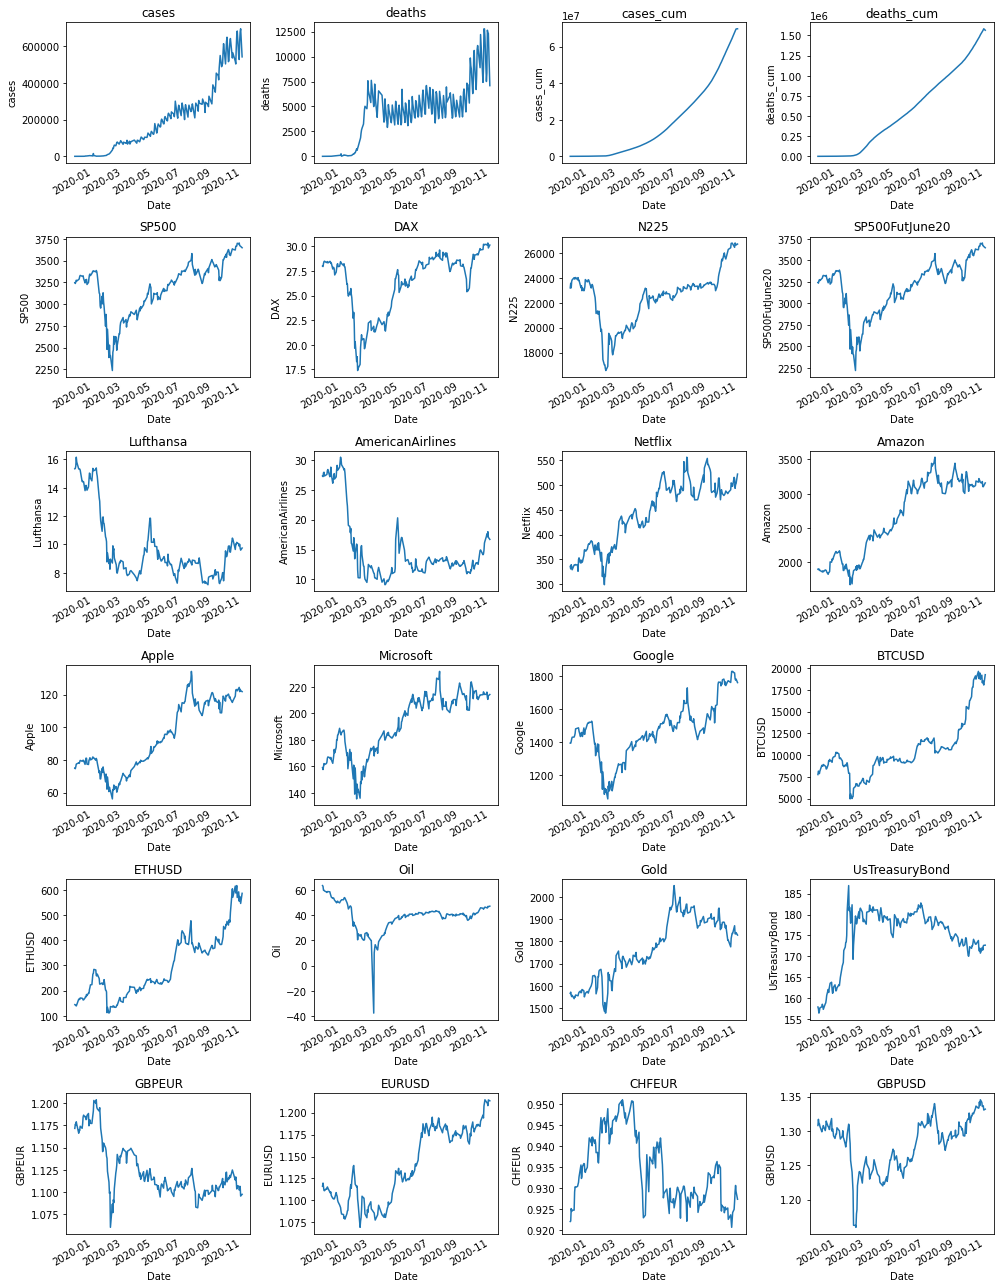

In [5]:
# Plot histograms
df_plot = df_covid_new.copy()

list_length = df_plot.shape[1]
ncols = 4
nrows = int(round(list_length / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

# Step #3 Create a Correlation Matrix

In [60]:
# Plotting a diagonal correlation matrix
sns.set(style="white")

# Compute the correlation matrix
df = pd.DataFrame(df_covid_new, columns=col_list)
corr = df_covid_new.corr()
corr

,cases,deaths,cases_cum,deaths_cum,SP500,DAX,N225,SP500FutJune20,Lufthansa,AmericanAirlines,...,Google,BTCUSD,ETHUSD,Oil,Gold,UsTreasuryBond,GBPEUR,EURUSD,CHFEUR,GBPUSD
cases,1.000000,0.866785,0.972467,0.966544,0.657124,0.511433,0.652883,0.653268,-0.457442,-0.418327,...,0.793603,0.898762,0.899406,0.063461,0.723691,0.153841,-0.566491,0.842553,-0.532430,0.505080
deaths,0.866785,1.000000,0.792822,0.821181,0.410572,0.271732,0.409316,0.406571,-0.596799,-0.592967,...,0.580001,0.720886,0.735953,-0.224083,0.681616,0.399529,-0.592282,0.647832,-0.308413,0.246843
cases_cum,0.972467,0.792822,1.000000,0.974049,0.707592,0.562328,0.704727,0.704479,-0.384061,-0.329981,...,0.809908,0.924506,0.932071,0.132834,0.685150,0.065973,-0.515624,0.864097,-0.578009,0.576411
deaths_cum,0.966544,0.821181,0.974049,1.000000,0.705107,0.578539,0.674716,0.701783,-0.504234,-0.447203,...,0.806002,0.877865,0.926702,0.087083,0.809137,0.201893,-0.625719,0.900560,-0.597316,0.520516
SP500,0.657124,0.410572,0.707592,0.705107,1.000000,0.959655,0.956683,0.999761,0.145518,0.208413,...,0.945129,0.800738,0.794730,0.622011,0.551901,-0.357575,-0.030726,0.731766,-0.787882,0.852130
DAX,0.511433,0.271732,0.562328,0.578539,0.959655,1.000000,0.934724,0.960365,0.250941,0.306996,...,0.860491,0.669466,0.680545,0.713545,0.498590,-0.384371,0.011825,0.677333,-0.840760,0.824840
N225,0.652883,0.409316,0.704727,0.674716,0.956683,0.934724,1.000000,0.957235,0.243016,0.283759,...,0.920553,0.822685,0.754296,0.652778,0.425913,-0.435912,0.005686,0.666511,-0.786309,0.807082
SP500FutJune20,0.653268,0.406571,0.704479,0.701783,0.999761,0.960365,0.957235,1.000000,0.151714,0.214431,...,0.944443,0.799129,0.792612,0.625488,0.547455,-0.361722,-0.026739,0.729819,-0.788767,0.853398
Lufthansa,-0.457442,-0.596799,-0.384061,-0.504234,0.145518,0.250941,0.243016,0.151714,1.000000,0.964956,...,-0.008857,-0.147060,-0.305735,0.631740,-0.665414,-0.855969,0.819387,-0.393603,-0.107033,0.265207
AmericanAirlines,-0.418327,-0.592967,-0.329981,-0.447203,0.208413,0.306996,0.283759,0.214431,0.964956,1.000000,...,0.024656,-0.124591,-0.254302,0.659146,-0.604617,-0.877986,0.795543,-0.317507,-0.141888,0.333637


# Step #4 Visualizing the Matrix as a Heatpmap

<AxesSubplot:>

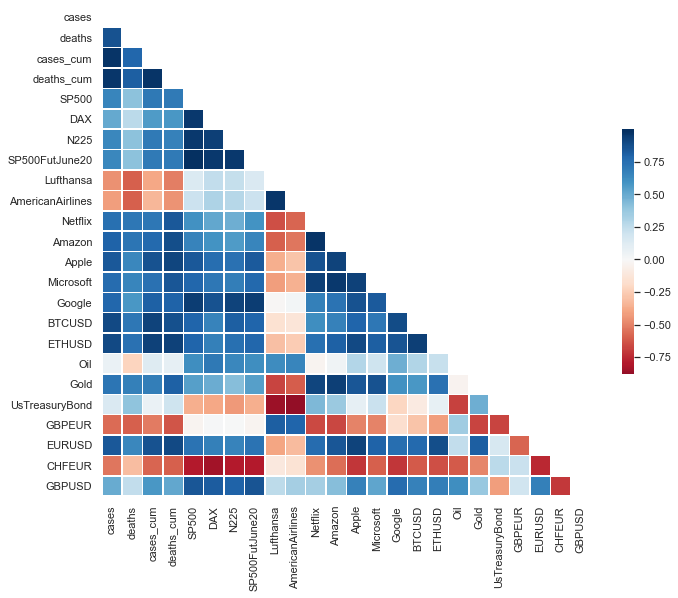

In [61]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "RdBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)